In [30]:
import numpy as np 
from data_loader import construct_X
from matplotlib import pyplot as plt

from PIL import Image

In [3]:
# Get data
input = construct_X(test_holdout=2)

In [4]:
U, S, VT = np.linalg.svd(input.X, full_matrices=False)

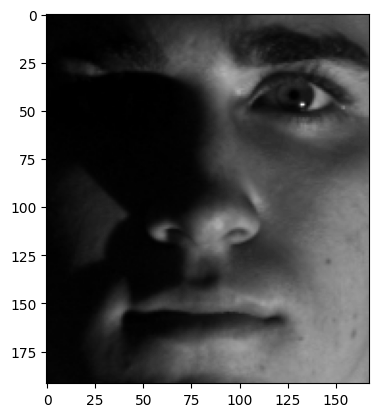

In [28]:
r_list = [3200]

for r in r_list:
    recon_face = (U[:, :r] @ (U[:, :r].T @ input.X_test[0]))
    recon_face = recon_face.reshape(recon_face.shape[0], 1) + input.avg_face
    img = plt.imshow(np.reshape(recon_face, (192, 168)))
    img.set_cmap('gray')
    plt.show()

In [47]:
# Sahil's face (generating 'alpha')
with Image.open('captured_faces/face_2024-05-19_23-33-20.png') as img:
    img_array = np.array(img)
    x = img_array.flatten()

sahil_alpha = U.T @ x
print(sahil_alpha)

[ 1.01136710e+04 -1.01695697e+03 -1.93892184e+03 ... -2.33375915e+01
 -8.58374274e+00 -2.68100375e+00]


0.9724363923107978


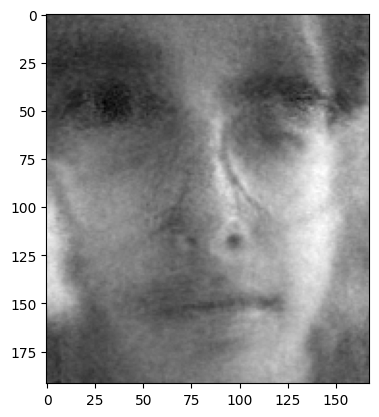

In [50]:
# Take another picture of Sahil and compare cosine similarity
with Image.open('captured_faces/face_2024-05-19_23-36-15.png') as img:
    img_array = np.array(img)
    x = img_array.flatten()

sahil_alpha_2 = U.T @ x

cos_sim = cosine = np.dot(sahil_alpha, sahil_alpha_2) / (np.linalg.norm(sahil_alpha) * np.linalg.norm(sahil_alpha_2))
print(cos_sim)

recon_face = U @ sahil_alpha_2
recon_face = recon_face.reshape(recon_face.shape[0], 1) + input.avg_face
img = plt.imshow(np.reshape(recon_face, (192, 168)))
img.set_cmap('gray')
plt.show()

0.6689884238409993


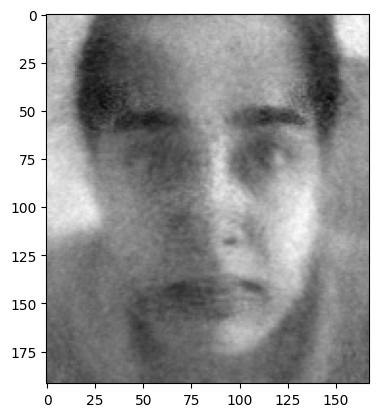

In [51]:
# Now take a picture of Esha and compare cosine similarity 
with Image.open('captured_faces/face_2024-05-19_23-38-59.png') as img:
    img_array = np.array(img)
    x = img_array.flatten()

esha_alpha = U.T @ x

cos_sim = cosine = np.dot(sahil_alpha, esha_alpha) / (np.linalg.norm(esha_alpha) * np.linalg.norm(esha_alpha))
print(cos_sim) 

recon_face = U @ esha_alpha
recon_face = recon_face.reshape(recon_face.shape[0], 1) + input.avg_face
img = plt.imshow(np.reshape(recon_face, (192, 168)))
img.set_cmap('gray')
plt.show()